IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

IMPORTING THE FILE


In [ ]:
cardata=pd.read_csv('/content/drive/MyDrive/car price prediction/car_data.csv')
cardata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
cardata.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
cardata.shape

(301, 9)

In [ ]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
cardata.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
cardata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(cardata.Fuel_Type.value_counts())
print(cardata.Transmission.value_counts())
print(cardata.Seller_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [ ]:
cardata.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,'CNG':3}},inplace=True)
cardata.replace({'Transmission':{'Automatic':1,'Manual':2}},inplace= True)
cardata.replace({'Seller_Type':{'Dealer':1,'Individual':2}},inplace=True)
cardata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,2,0
1,sx4,2013,4.75,9.54,43000,2,1,2,0
2,ciaz,2017,7.25,9.85,6900,1,1,2,0
3,wagon r,2011,2.85,4.15,5200,1,1,2,0
4,swift,2014,4.60,6.87,42450,2,1,2,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,1,2,0
297,brio,2015,4.00,5.90,60000,1,1,2,0
298,city,2009,3.35,11.00,87934,1,1,2,0
299,city,2017,11.50,12.50,9000,2,1,2,0


In [ ]:
X=cardata.drop(['Car_Name','Selling_Price'],axis=1)
Y=cardata['Selling_Price']
cardata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,2,0
1,sx4,2013,4.75,9.54,43000,2,1,2,0
2,ciaz,2017,7.25,9.85,6900,1,1,2,0
3,wagon r,2011,2.85,4.15,5200,1,1,2,0
4,swift,2014,4.60,6.87,42450,2,1,2,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,1,2,0
297,brio,2015,4.00,5.90,60000,1,1,2,0
298,city,2009,3.35,11.00,87934,1,1,2,0
299,city,2017,11.50,12.50,9000,2,1,2,0


In [ ]:
X.shape,Y.shape

((301, 7), (301,))

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=98)

In [ ]:
lir=LinearRegression()
lir.fit(X_train,Y_train)

LinearRegression()

In [ ]:
X_train_prediction = lir.predict(X_train)
training_error_score = metrics.r2_score(Y_train, X_train_prediction)
print(training_error_score*100)

87.97010629675526


<function matplotlib.pyplot.show>

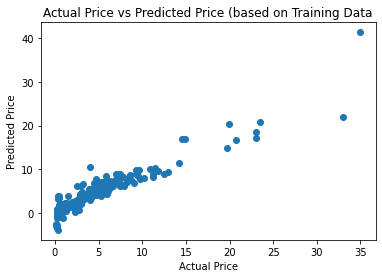

In [ ]:
plt.scatter(Y_train,X_train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price (based on Training Data')
plt.show

In [ ]:
X_test_prediction = lir.predict(X_test)
training_error_score = metrics.r2_score(Y_test,X_test_prediction)
print(training_error_score*100)

86.80019390575197


<function matplotlib.pyplot.show>

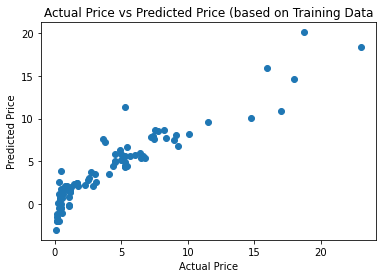

In [ ]:
plt.scatter(Y_test,X_test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price (based on Training Data')
plt.show